In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats

In [2]:
url = "/Users/enial/OneDrive/Escritorio/amz_uk_price_prediction_dataset.csv"
df = pd.read_csv(url)

In [3]:
df.head(10)

,uid,asin,title,stars,reviews,price,isBestSeller,boughtInLastMonth,category
0,1,B09B96TG33,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
1,2,B01HTH3C8S,"Anker Soundcore mini, Super-Portable Bluetooth...",4.7,98099,23.99,True,0,Hi-Fi Speakers
2,3,B09B8YWXDF,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
3,4,B09B8T5VGV,"Echo Dot with clock (5th generation, 2022 rele...",4.7,7205,31.99,False,0,Hi-Fi Speakers
4,5,B09WX6QD65,Introducing Echo Pop | Full sound compact Wi-F...,4.6,1881,17.99,False,0,Hi-Fi Speakers
5,6,B09B97WSLF,"Echo Dot with clock (5th generation, 2022 rele...",4.7,7205,31.99,False,0,Hi-Fi Speakers
6,7,B09B9615X2,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
7,8,B01MTB55WH,Anker Soundcore 2 Portable Bluetooth Speaker w...,4.7,103673,39.99,False,0,Hi-Fi Speakers
8,9,B016MO90GW,"Bluetooth Speaker, Anker Soundcore Speaker Upg...",4.7,29909,29.99,False,0,Hi-Fi Speakers
9,10,B09ZQF5GZW,RIENOK Bluetooth Speaker Portable Wireless Blu...,4.5,16014,29.99,False,0,Hi-Fi Speakers


In [4]:
df.shape

(2443651, 9)

In [5]:
df.nunique()

uid                  2443651
asin                 2222742
title                2077591
stars                     42
reviews                19446
price                  82916
isBestSeller               2
boughtInLastMonth         25
category                 296
dtype: int64

In [6]:
cross_tab = pd.crosstab(df['category'], df['isBestSeller'])

In [7]:
cross_tab

isBestSeller,False,True
category,,
3D Printers,247,1
3D Printing & Scanning,4065,2
Abrasive & Finishing Products,245,5
Action Cameras,1696,1
Adapters,251,3
...,...,...
Wind Instruments,243,7
Window Treatments,234,5
Women,17559,213


In [9]:
cross_tab['best_seller_ratio'] = cross_tab[True] / (cross_tab[True] + cross_tab[False])

In [30]:
cross_tab

isBestSeller,False,True,best_seller_ratio
category,,,
3D Printers,247,1,0.004032
3D Printing & Scanning,4065,2,0.000492
Abrasive & Finishing Products,245,5,0.020000
Action Cameras,1696,1,0.000589
Adapters,251,3,0.011811
...,...,...,...
Wind Instruments,243,7,0.028000
Window Treatments,234,5,0.020921
Women,17559,213,0.011985


In [11]:
sorted_categ = cross_tab.sort_values(by='best_seller_ratio', ascending=False)

In [12]:
sorted_categ

isBestSeller,False,True,best_seller_ratio
category,,,
Grocery,9008,556,0.058135
Smart Home Security & Lighting,98,6,0.057692
Health & Personal Care,9017,552,0.057686
Mobile Phone Accessories,248,11,0.042471
Power & Hand Tools,8353,306,0.035339
...,...,...,...
Bedding Collections,6309,0,0.000000
CPUs,249,0,0.000000
"CD, Disc & Tape Players",8798,0,0.000000


In [14]:
from scipy.stats import chi2_contingency

chi2, p, dof, expected = chi2_contingency(cross_tab)

# Mostrar los resultados
print("Estadístico Chi-cuadrado:", chi2)
print("Grados de libertad:", dof)
print("p-valor:", p)
print("\nTabla esperada:")
print(pd.DataFrame(expected, index=cross_tab.index, columns=cross_tab.columns))

# Interpretar el p-valor
alpha = 0.05  # Nivel de significancia
if p < alpha:
    print("\nRechazamos la hipótesis nula: Existe una relación entre la categoría del producto y ser Best-Seller.")
else:
    print("\nNo se rechaza la hipótesis nula: No hay evidencia suficiente para concluir que existe una relación.")

Estadístico Chi-cuadrado: 36684.23786636857
Grados de libertad: 590
p-valor: 0.0

Tabla esperada:
isBestSeller                           False       True  best_seller_ratio
category                                                                  
3D Printers                       247.193964   0.809883           0.000185
3D Printing & Scanning           4053.716248  13.281209           0.003035
Abrasive & Finishing Products     249.203347   0.816466           0.000187
Action Cameras                   1691.457593   5.541730           0.001266
Adapters                          253.182120   0.829502           0.000190
...                                      ...        ...                ...
Wind Instruments                  249.211321   0.816492           0.000187
Window Treatments                 238.240195   0.780547           0.000178
Women                           17713.962387  58.036336           0.013263
Women's Sports & Outdoor Shoes   1952.611398   6.397350           0.001462
eB

In [15]:
# Calcular la V de Cramér
n = cross_tab.to_numpy().sum()  # Total de observaciones
k = min(cross_tab.shape)  # Mínimo entre número de filas y columnas
cramers_v = np.sqrt(chi2 / (n * (k - 1)))

# Mostrar el resultado
print("V de Cramér:", cramers_v)

# Interpretar la fuerza de la asociación (valores típicos de referencia)
if cramers_v < 0.1:
    interpretation = "Asociación muy débil"
elif cramers_v < 0.3:
    interpretation = "Asociación débil"
elif cramers_v < 0.5:
    interpretation = "Asociación moderada"
else:
    interpretation = "Asociación fuerte"

print("Interpretación de la fuerza de asociación:", interpretation)

V de Cramér: 0.08663731815334759
Interpretación de la fuerza de asociación: Asociación muy débil


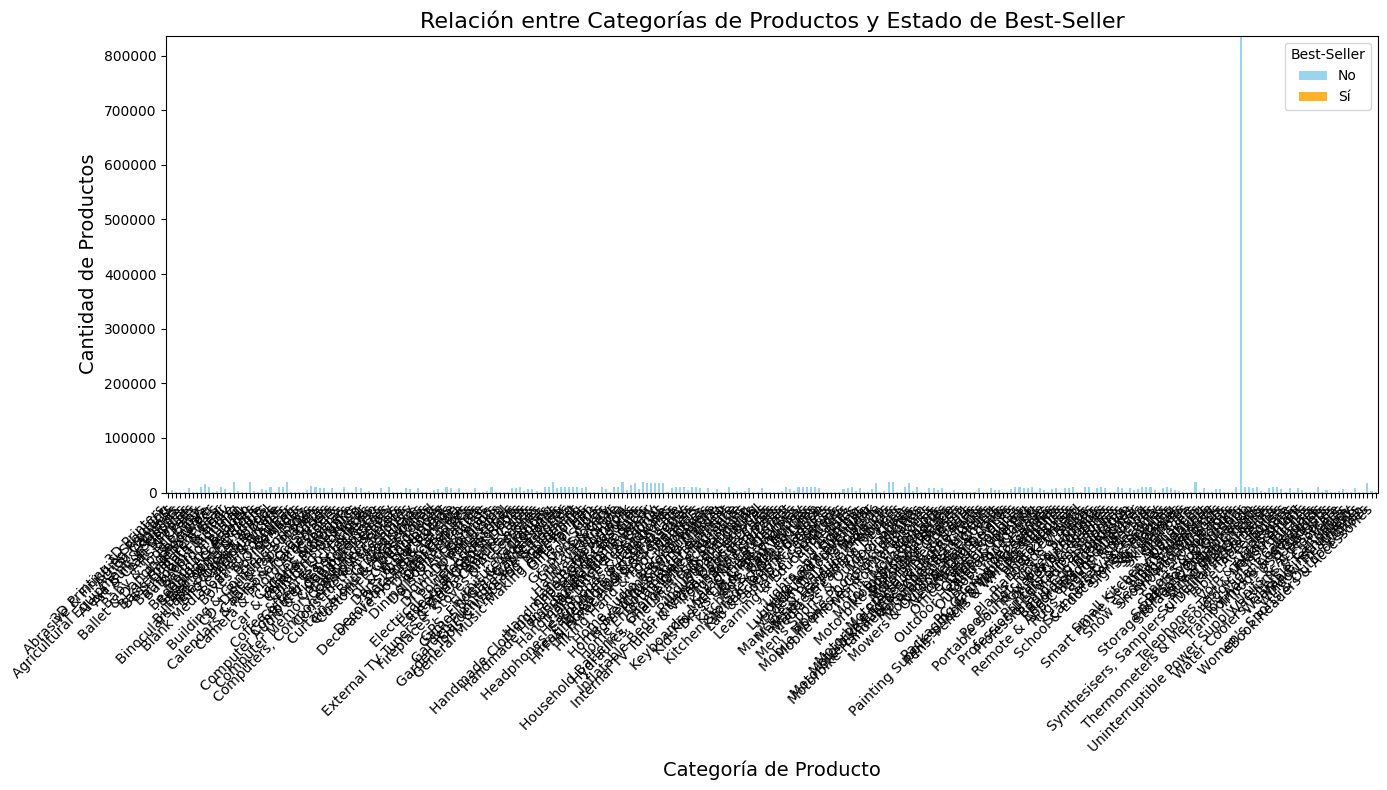

In [31]:
# Crear el gráfico de barras apiladas
fig, ax = plt.subplots(figsize=(14, 8))  # Aumentar el ancho del gráfico
cross_tab.plot(
    kind='bar',
    stacked=True,
    ax=ax,
    color=['skyblue', 'orange'],
    alpha=0.85
)

# Rotar y alinear etiquetas del eje X
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right', fontsize=10)

# Personalizar el gráfico
ax.set_title('Relación entre Categorías de Productos y Estado de Best-Seller', fontsize=16)
ax.set_xlabel('Categoría de Producto', fontsize=14)
ax.set_ylabel('Cantidad de Productos', fontsize=14)
ax.legend(title='Best-Seller', labels=['No', 'Sí'])
plt.tight_layout()

# Mostrar el gráfico
plt.show()


In [ ]:
# Paso 1: Calcular Q1, Q3 e IQR para la columna 'price'
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)
IQR = Q3 - Q1

# Paso 2: Calcular los límites inferior y superior
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Paso 3: Filtrar el DataFrame para eliminar valores atípicos
new_df = df[(df['price'] >= lower_bound) & (df['price'] <= upper_bound)]

# Mostrar la cantidad de datos antes y después de filtrar
print(f"Cantidad de datos originales: {len(df)}")
print(f"Cantidad de datos después de eliminar valores atípicos: {len(new_df)}")



Cantidad de datos originales: 2443651
Cantidad de datos después de eliminar valores atípicos: 2115963


C:\Users\enial\AppData\Local\Temp\ipykernel_21480\3191685774.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(
C:\Users\enial\AppData\Local\Temp\ipykernel_21480\3191685774.py:7: FutureWarning: 

The `scale` parameter has been renamed and will be removed in v0.15.0. Pass `density_norm='width'` for the same effect.
  sns.violinplot(


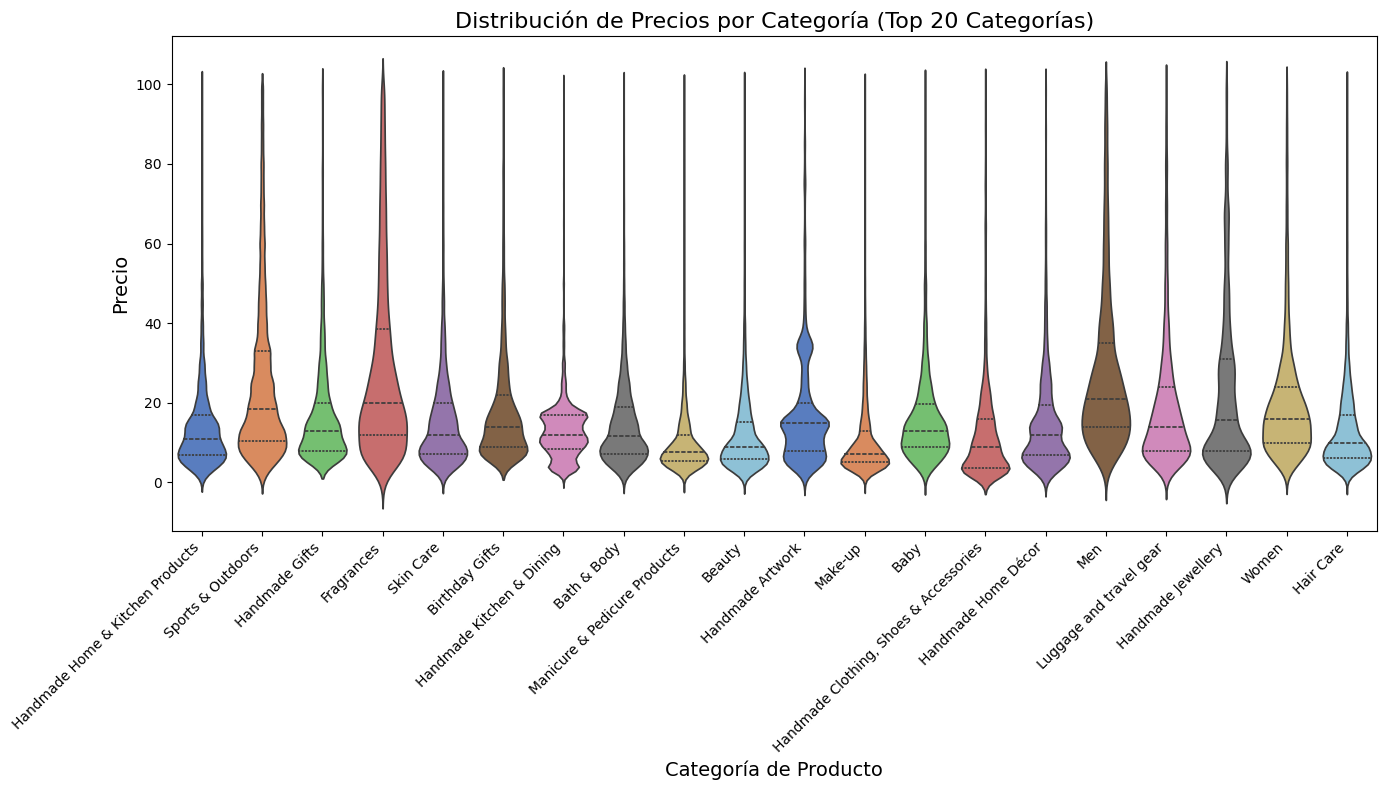

La categoría con el precio medio más alto es 'Motherboards' con un precio medio de 68.77.


In [35]:
# Filtrar las 20 categorías principales en función del recuento de productos
top_categories = new_df['category'].value_counts().head(20).index
filtered_df = new_df[new_df['category'].isin(top_categories)]

# Crear el gráfico de violín
plt.figure(figsize=(14, 8))
sns.violinplot(
    data=filtered_df,
    x='category',
    y='price',
    scale='width',
    inner='quartile',
    palette='muted'
)

# Personalizar el gráfico
plt.title('Distribución de Precios por Categoría (Top 20 Categorías)', fontsize=16)
plt.xlabel('Categoría de Producto', fontsize=14)
plt.ylabel('Precio', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.tight_layout()

# Mostrar el gráfico
plt.show()

# Encontrar la categoría con el precio medio más alto en el conjunto completo
category_with_highest_mean_price = new_df.groupby('category')['price'].mean().idxmax()
highest_mean_price = new_df.groupby('category')['price'].mean().max()

print(f"La categoría con el precio medio más alto es '{category_with_highest_mean_price}' con un precio medio de {highest_mean_price:.2f}.")


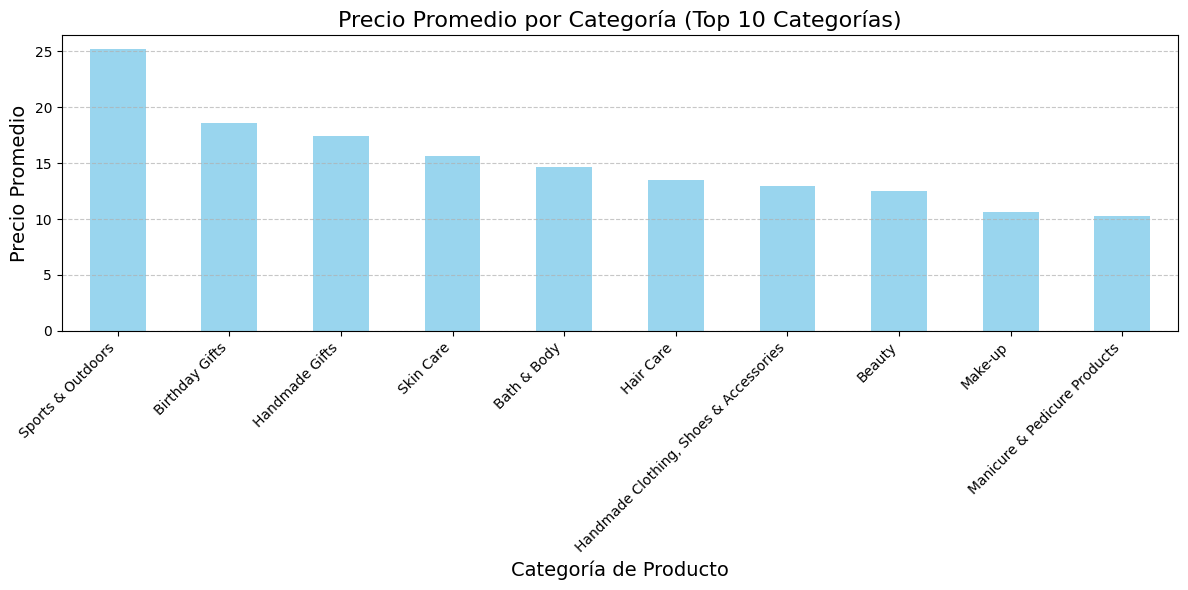

La categoría con el precio promedio más alto en todo el conjunto es 'Motherboards' con un precio promedio de 68.77.


In [38]:
# Identificar las 10 categorías principales según el recuento
top_10_categories = new_df['category'].value_counts().head(10).index
top_10_df = new_df[new_df['category'].isin(top_10_categories)]

# Calcular el precio promedio por categoría para las 10 principales
average_price_top_10 = top_10_df.groupby('category')['price'].mean().sort_values(ascending=False)

# Crear el gráfico de barras
plt.figure(figsize=(12, 6))
average_price_top_10.plot(
    kind='bar',
    color='skyblue',
    alpha=0.85
)

# Personalizar el gráfico
plt.title('Precio Promedio por Categoría (Top 10 Categorías)', fontsize=16)
plt.xlabel('Categoría de Producto', fontsize=14)
plt.ylabel('Precio Promedio', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Mostrar el gráfico
plt.show()

# Determinar la categoría con el precio promedio más alto en todo el conjunto
overall_highest_category = new_df.groupby('category')['price'].mean().idxmax()
overall_highest_price = new_df.groupby('category')['price'].mean().max()

print(f"La categoría con el precio promedio más alto en todo el conjunto es '{overall_highest_category}' con un precio promedio de {overall_highest_price:.2f}.")


C:\Users\enial\AppData\Local\Temp\ipykernel_21480\985396671.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


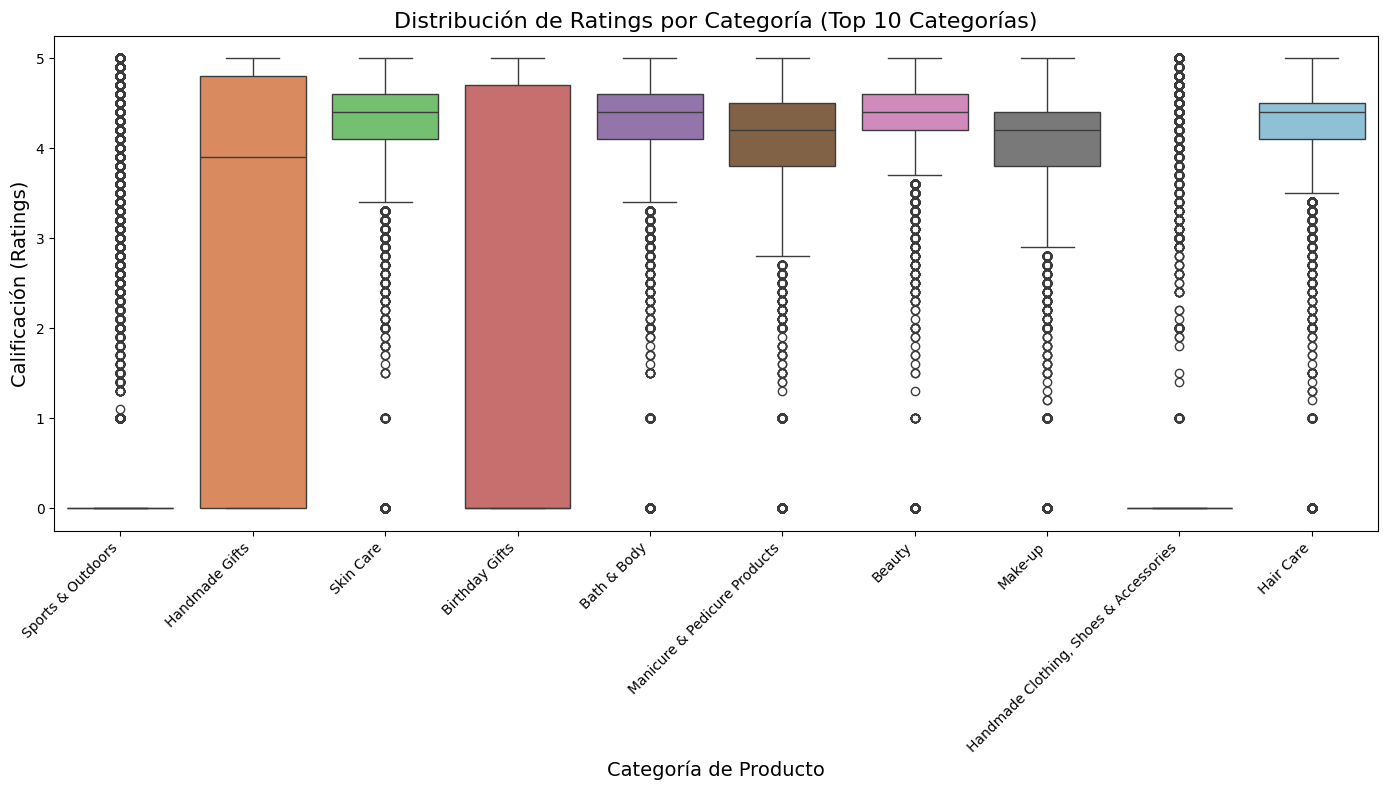

La categoría con la calificación media más alta es 'Luxury Food & Drink' con un promedio de 4.54 estrellas.


In [39]:
# Filtrar las 10 categorías principales según el recuento
top_10_categories = new_df['category'].value_counts().head(10).index
filtered_df = new_df[new_df['category'].isin(top_10_categories)]

# Crear los diagramas de cajas
plt.figure(figsize=(14, 8))
sns.boxplot(
    data=filtered_df,
    x='category',
    y='stars',
    palette='muted'
)

# Personalizar el gráfico
plt.title('Distribución de Ratings por Categoría (Top 10 Categorías)', fontsize=16)
plt.xlabel('Categoría de Producto', fontsize=14)
plt.ylabel('Calificación (Ratings)', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.tight_layout()

# Mostrar el gráfico
plt.show()

# Determinar la categoría con la calificación media más alta en todo el conjunto
category_with_highest_avg_rating = new_df.groupby('category')['stars'].mean().idxmax()
highest_avg_rating = new_df.groupby('category')['stars'].mean().max()

print(f"La categoría con la calificación media más alta es '{category_with_highest_avg_rating}' con un promedio de {highest_avg_rating:.2f} estrellas.")


In [40]:
from scipy.stats import pearsonr

# Calcular el coeficiente de correlación de Pearson entre price y stars
correlation, p_value = pearsonr(new_df['price'], new_df['stars'])

# Mostrar los resultados
print(f"Coeficiente de correlación de Pearson: {correlation:.4f}")
print(f"Valor p: {p_value:.4f}")

# Determinar si la correlación es significativa (usualmente si p < 0.05)
if p_value < 0.05:
    print("Existe una correlación significativa entre el precio y la calificación del producto.")
else:
    print("No existe una correlación significativa entre el precio y la calificación del producto.")


Coeficiente de correlación de Pearson: -0.1249
Valor p: 0.0000
Existe una correlación significativa entre el precio y la calificación del producto.


In [43]:
# Limpiar la columna 'price' convirtiendo valores no numéricos a NaN
new_df['price'] = pd.to_numeric(new_df['price'], errors='coerce')

# Eliminar filas con precios nulos (NaN)
new_df = new_df.dropna(subset=['price'])

C:\Users\enial\AppData\Local\Temp\ipykernel_21480\3155868231.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['price'] = pd.to_numeric(new_df['price'], errors='coerce')


In [47]:
# Limpiar la columna 'price' convirtiendo valores no numéricos a NaN
new_df['stars'] = pd.to_numeric(new_df['stars'], errors='coerce')

# Eliminar filas con precios nulos (NaN)
new_df = new_df.dropna(subset=['stars'])

In [49]:
new_df['stars'].value_counts()

stars
0.0    1001620
4.5     139854
4.6     126991
4.4     125615
5.0     114586
4.3     103415
4.7      86997
4.2      80069
4.0      60247
4.1      59498
4.8      38405
3.9      33308
3.8      25250
3.7      19152
3.6      14684
3.5      13205
3.0      11620
4.9      10010
3.4       9319
1.0       7487
3.3       7455
3.2       5180
3.1       4221
2.0       3480
2.9       2987
2.8       2084
2.5       1894
2.7       1889
2.6       1430
2.4        940
2.3        664
2.2        543
2.1        479
1.5        363
1.9        274
1.8        227
1.7        159
1.4        141
1.6        127
1.3         71
1.2         20
1.1          3
Name: count, dtype: int64

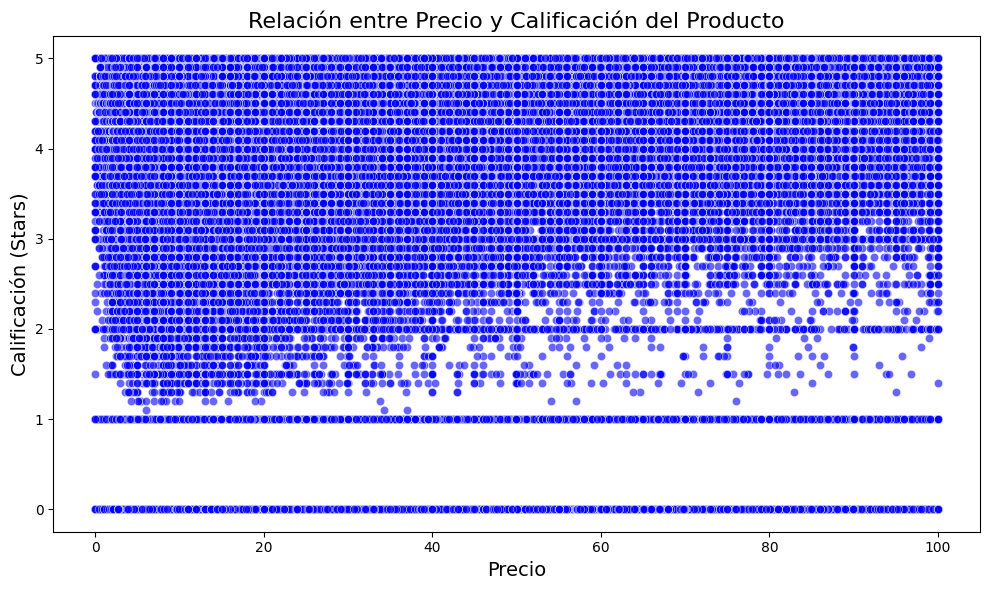

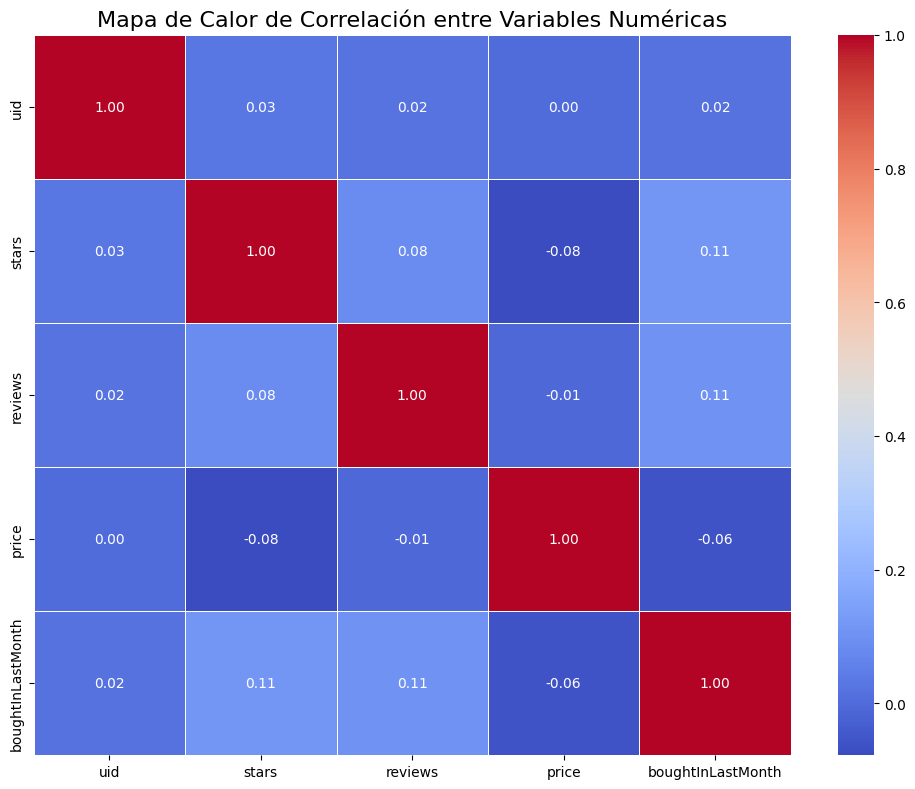

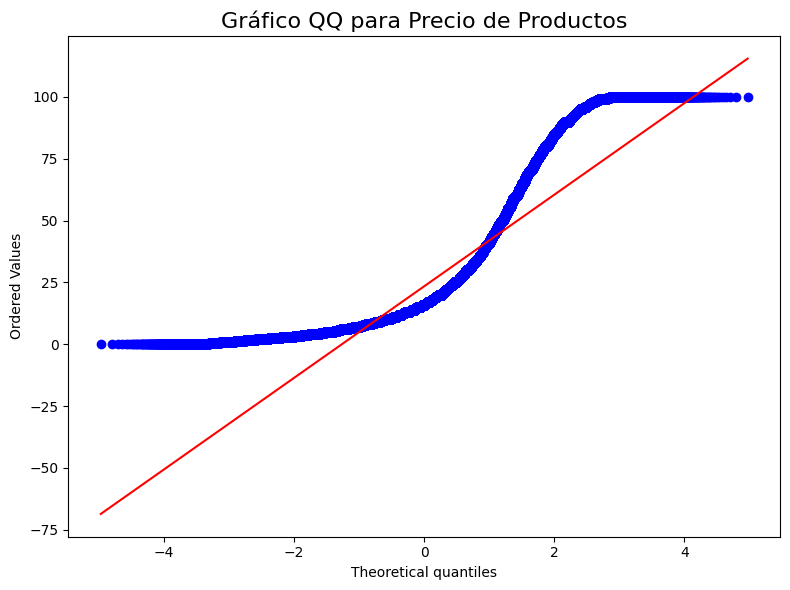

In [51]:
# 1. Diagrama de dispersión entre precio y calificación
plt.figure(figsize=(10, 6))
sns.scatterplot(data=new_df, x='price', y='stars', alpha=0.6, color='blue')
plt.title('Relación entre Precio y Calificación del Producto', fontsize=16)
plt.xlabel('Precio', fontsize=14)
plt.ylabel('Calificación (Stars)', fontsize=14)
plt.tight_layout()
plt.show()

# 2. Mapa de calor de correlación entre todas las variables numéricas

# Selecciona solo las columnas numéricas
new_df_numeric = new_df.select_dtypes(include=['number'])

# Calcular la matriz de correlación
corr_matrix = new_df_numeric.corr()

# Visualizar el mapa de calor
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Mapa de Calor de Correlación entre Variables Numéricas', fontsize=16)
plt.tight_layout()
plt.show()


# 3. Gráfico QQ para verificar la normalidad de los precios
plt.figure(figsize=(8, 6))
stats.probplot(new_df['price'].dropna(), dist="norm", plot=plt)
plt.title('Gráfico QQ para Precio de Productos', fontsize=16)
plt.tight_layout()
plt.show()
